## 1. INTRODUÇÃO

Este é um projeto que objetiva treinar um modelo de machine learning para resolver um problema de classificação. Para isso conta com uma base contendo algumas informações de clientes e um target alvo identificando a concessão ou não de crédito.
Será testado e comparado o desempenho de diversos algoritmos (começando dos mais simples para os mais complexos) em diversas circunstâncias (com tratamento de variáveis categóricas, agrupamento de dados, normalização, etc) 

In [120]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import TomekLinks

In [121]:
df  = pd.read_csv('/Users/bianca/Documents/Itau-Analise-de-Credito/Inputs/credit_analysis_data.csv')

### 1.1 Exploração dos dados

In [122]:
#verificando quantidade de registros e colunas
df.shape

(1000, 14)

In [123]:
#Visualizando os dados
df.head()

,Age,Income,Loan Amount,Loan Term,Credit Score,Number of Defaults,Education Level,Employment Status,Marital Status,Number of Dependents,Home Ownership,Years in Residence,Annual Expenses,Default Probability
0,56,25903,37269,47,761,3,PhD,Employed,Married,5,Rent,28,20629,1
1,69,53051,16003,54,312,0,Bachelor,Employed,Single,1,Mortgage,12,41678,0
2,46,38654,22246,48,683,3,Bachelor,Employed,Married,3,Own,7,20467,0
3,32,28666,29325,26,698,1,Bachelor,Employed,Married,1,Own,21,39952,0
4,60,40301,5816,39,318,2,PhD,Employed,Single,3,Own,20,29884,0


In [124]:
#Identificando tipo/formato das features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   1000 non-null   int64 
 1   Income                1000 non-null   int64 
 2   Loan Amount           1000 non-null   int64 
 3   Loan Term             1000 non-null   int64 
 4   Credit Score          1000 non-null   int64 
 5   Number of Defaults    1000 non-null   int64 
 6   Education Level       1000 non-null   object
 7   Employment Status     1000 non-null   object
 8   Marital Status        1000 non-null   object
 9   Number of Dependents  1000 non-null   int64 
 10  Home Ownership        1000 non-null   object
 11  Years in Residence    1000 non-null   int64 
 12  Annual Expenses       1000 non-null   int64 
 13  Default Probability   1000 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 109.5+ KB


In [125]:
#Entendimento sobre contagem de registros, médias, valores mínimos e máximos
df.describe()

,Age,Income,Loan Amount,Loan Term,Credit Score,Number of Defaults,Number of Dependents,Years in Residence,Annual Expenses,Default Probability
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,43.81900,50863.121000,20203.059000,35.661000,578.81400,2.006000,2.548000,14.777000,30039.377000,0.197000
std,14.99103,14823.257362,9809.574573,13.686248,158.33446,1.418441,1.710152,8.606587,9864.135905,0.397931
min,18.00000,6556.000000,-10195.000000,12.000000,300.00000,0.000000,0.000000,0.000000,-2173.000000,0.000000
25%,31.00000,40822.250000,13585.000000,24.000000,443.00000,1.000000,1.000000,7.000000,22985.000000,0.000000
50%,44.00000,50807.000000,20038.000000,35.000000,582.00000,2.000000,3.000000,15.000000,30190.000000,0.000000
75%,56.00000,60281.750000,26842.000000,48.000000,722.00000,3.000000,4.000000,23.000000,36921.750000,0.000000
max,69.00000,89485.000000,51931.000000,59.000000,849.00000,4.000000,5.000000,29.000000,57345.000000,1.000000


In [126]:
#Verifica se há valores nulos
df.isnull().sum()

Age                     0
Income                  0
Loan Amount             0
Loan Term               0
Credit Score            0
Number of Defaults      0
Education Level         0
Employment Status       0
Marital Status          0
Number of Dependents    0
Home Ownership          0
Years in Residence      0
Annual Expenses         0
Default Probability     0
dtype: int64

In [127]:
#Verifica se há duplicados
df.duplicated().sum()

0

In [128]:
#Verifica quantos valores distintos há em cada coluna
df.nunique()

Age                      52
Income                  994
Loan Amount             987
Loan Term                48
Credit Score            458
Number of Defaults        5
Education Level           4
Employment Status         3
Marital Status            4
Number of Dependents      6
Home Ownership            3
Years in Residence       30
Annual Expenses         988
Default Probability       2
dtype: int64

In [129]:
# verifica o balanceamento das classes
#Conclusão: classe desbalanceada. 

df['Default Probability'].value_counts()

0    803
1    197
Name: Default Probability, dtype: int64

### 1.2 Tratamento de Variáveis Categóricas

Label Encoding é uma técnica de pré-processamento de dados que transforma valores categóricos em valores numéricos, viabilizando o treinamento de algoritmos de machine learning que não trabalham diretamente com dados categóricos como a Regressão Linear.  


In [130]:
from sklearn.preprocessing import LabelEncoder

In [131]:
df_categorico = df.copy()

In [132]:
#Transformação de Variáveris categóricas em numérica
label_encoder = LabelEncoder()
df_categorico['Education Level'] = label_encoder.fit_transform(df_categorico['Education Level'])
df_categorico['Employment Status'] = label_encoder.fit_transform(df_categorico['Employment Status'])
df_categorico['Marital Status'] = label_encoder.fit_transform(df_categorico['Marital Status']) 
df_categorico['Home Ownership'] = label_encoder.fit_transform(df_categorico['Home Ownership']) 


In [133]:
#Conferindo transformação das variáveis categóricas
df_categorico.head()

,Age,Income,Loan Amount,Loan Term,Credit Score,Number of Defaults,Education Level,Employment Status,Marital Status,Number of Dependents,Home Ownership,Years in Residence,Annual Expenses,Default Probability
0,56,25903,37269,47,761,3,3,0,1,5,2,28,20629,1
1,69,53051,16003,54,312,0,0,0,2,1,0,12,41678,0
2,46,38654,22246,48,683,3,0,0,1,3,1,7,20467,0
3,32,28666,29325,26,698,1,0,0,1,1,1,21,39952,0
4,60,40301,5816,39,318,2,3,0,2,3,1,20,29884,0


#### Treinando 1º Modelo

O resultado desse primeiro reino será a base de comparação para os demais testes. Aqui temos os dados da forma mais simples possível para aplicação da Regressão Logistica, apenas com a conversão das variáveis categóricas.

In [134]:
#Separação de features
X_1 = df_categorico.iloc[:, 0:12].values
X_1.shape

(1000, 12)

In [135]:
#Separação das classes
y_1 = df_categorico.iloc[:, 13].values
y_1.shape

(1000,)

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [137]:
# Dividindo bases de treino e teste
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1, test_size= 0.2)

In [138]:
#Treinando o modelo
regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_train_1, y_train_1)

C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [139]:
# Aplicando previsões aos dados de teste
y_pred_1 = regressao_logistica.predict(x_test_1)

In [140]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test_1, y_pred_1)
conf_matrix = confusion_matrix(y_test_1, y_pred_1)
class_report = classification_report(y_test_1, y_pred_1)

print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)

Acurácia: 0.755
Matriz de Confusão:
 [[151   0]
 [ 49   0]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200



C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

### 1.3 Agrupamento dos dados

O agrupamento será aplicado com objetivo de simplificar os dados, reduzir ruídos, outliers e outros fatores que impactam na performance do modelo de Regressão Logística.

In [141]:
df_grouped = df_categorico.copy()

In [142]:
#Agrupando dados idade 
bins = [18, 28, 38, 48 , 58, 69 ]
labels = ['18-28', '29-38', '39-48', '49-58', '59-69']
df_grouped['Idade'] = pd.cut(df_grouped['Age'], bins=bins, labels=labels)


In [143]:
#Agrupando dados renda 
bins = [ 6556, 10000, 20000, 30000 , 40000, 50000,60000,70000,80000,90000 ]
labels = ['0-10 mil', '0-20 mil', '0-30 mil', '0-40 mil', '0-50 mil', '0-60 mil', '0-70 mil', '0-80 mil', '0-90 mil']
df_grouped['Renda'] = pd.cut(df_grouped['Income'], bins=bins, labels=labels)

In [144]:
#Agrupando dados valor do emprestimo 
bins = [-11000, 10000, 20000, 30000 , 40000, 50000,60000]
labels = ['0-10 mil', '0-20 mil', '0-30 mil', '0-40 mil', '0-50 mil', '0-60 mil']
df_grouped['valor_emprestimo'] = pd.cut(df_grouped['Loan Amount'], bins=bins, labels=labels)

In [145]:
#Agrupando dados prazo do emprestimo 
bins = [12, 24, 36, 48 , 60]
labels = ['12-24', '25-36', '37-48', '48-60']
df_grouped['prazo_pag'] = pd.cut(df_grouped['Loan Term'], bins=bins, labels=labels)

In [146]:
#Agrupando dados score 
bins = [0, 300, 600, 900 ]
labels = ['0-300', '300-600', '600-900']
df_grouped['pontos_credito'] = pd.cut(df_grouped['Credit Score'], bins=bins, labels=labels)

In [147]:
#Agrupando dados anos de residencia 
bins = [0, 5, 10, 15 , 20, 25, 30 ]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']
df_grouped['anos_residencia'] = pd.cut(df_grouped['Years in Residence'], bins=bins, labels=labels)

In [148]:
#Agrupando dados anos de residencia 
bins = [-3000, 0, 10000, 20000 , 30000, 40000, 50000, 60000 ]
labels = ['neg-0', '0-10', '10-20', '20-30', '30-40', '40-50', '50-60']
df_grouped['gasto_anual'] = pd.cut(df_grouped['Annual Expenses'], bins=bins, labels=labels)

In [149]:
df_grouped['Idade'] = label_encoder.fit_transform(df_grouped['Idade']) 
df_grouped['Renda'] = label_encoder.fit_transform(df_grouped['Renda'])
df_grouped['valor_emprestimo'] = label_encoder.fit_transform(df_grouped['valor_emprestimo'])
df_grouped['prazo_pag'] = label_encoder.fit_transform(df_grouped['prazo_pag'])
df_grouped['pontos_credito'] = label_encoder.fit_transform(df_grouped['pontos_credito'])
df_grouped['anos_residencia'] = label_encoder.fit_transform(df_grouped['anos_residencia'])
df_grouped['gasto_anual'] = label_encoder.fit_transform(df_grouped['gasto_anual'])


In [150]:
#Conferindo resultados
df_grouped.nunique()

Age                      52
Income                  994
Loan Amount             987
Loan Term                48
Credit Score            458
Number of Defaults        5
Education Level           4
Employment Status         3
Marital Status            4
Number of Dependents      6
Home Ownership            3
Years in Residence       30
Annual Expenses         988
Default Probability       2
Idade                     6
Renda                    10
valor_emprestimo          6
prazo_pag                 5
pontos_credito            3
anos_residencia           7
gasto_anual               7
dtype: int64

In [151]:
selected_columns = ['Number of Defaults', 'Education Level', 'Employment Status', 'Marital Status',
                     'Number of Dependents', 'Home Ownership', 'Idade', 'Renda', 
                     'valor_emprestimo', 'prazo_pag', 'pontos_credito', 'anos_residencia',
                     'gasto_anual', 'Default Probability']
df_grouped_final = df_grouped[selected_columns]

In [152]:
df_grouped_final.nunique()
#df_grouped_final.info()

Number of Defaults       5
Education Level          4
Employment Status        3
Marital Status           4
Number of Dependents     6
Home Ownership           3
Idade                    6
Renda                   10
valor_emprestimo         6
prazo_pag                5
pontos_credito           3
anos_residencia          7
gasto_anual              7
Default Probability      2
dtype: int64

### Treinamento 2º modelo

Neste momento será testada a performance do modelo utilizando os dados agrupados, comparando-os com o treinamento anterior que utilizou dados desagrupados.

In [153]:
#Separação de features
X_2 = df_categorico.iloc[:, 0:12].values
X_2.shape

(1000, 12)

In [154]:
#Separação das classes
y_2 = df_categorico.iloc[:, 13].values
y_2.shape

(1000,)

In [155]:
# Dividindo bases de treino e teste
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2, test_size= 0.2)


In [156]:
#Treinando o modelo
regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_train_2, y_train_2)


C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [157]:
# Aplicando previsões aos dados de teste
y_pred_2 = regressao_logistica.predict(x_test_2)


In [158]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test_2, y_pred_2)
conf_matrix = confusion_matrix(y_test_2, y_pred_2)
class_report = classification_report(y_test_2, y_pred_2)

print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)

Acurácia: 0.815
Matriz de Confusão:
 [[163   0]
 [ 37   0]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       163
           1       0.00      0.00      0.00        37

    accuracy                           0.81       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.66      0.81      0.73       200



C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

## Analise Exploratoria

Esta etapa estudará os dados com o objetivo de selecionar as melhores features para treinar o modelo, objetivando a melhoria dos resultados.

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

Teste de Correlação: Comparação entre dados originais, dados categóricos transformados, dados numéricos agrupados.

In [180]:
# dados originais
correlations_df = df.corr()['Default Probability'].drop('Default Probability')  # Remove a correlação da target consigo mesma

# Criar um DataFrame com as correlações e ordenar em ordem crescente
correlations_df = pd.DataFrame(correlations_df)
correlations_df.columns = ['correlation']
correlations_df = correlations_df.sort_values(by='correlation', ascending=True)

C:\Users\bianca\AppData\Local\Temp\ipykernel_41504\3128992548.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_df = df.corr()['Default Probability'].drop('Default Probability')  # Remove a correlação da target consigo mesma


C:\Users\bianca\AppData\Local\Temp\ipykernel_41504\2946456900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_df['correlation'], y=correlation_df.index, palette='coolwarm')


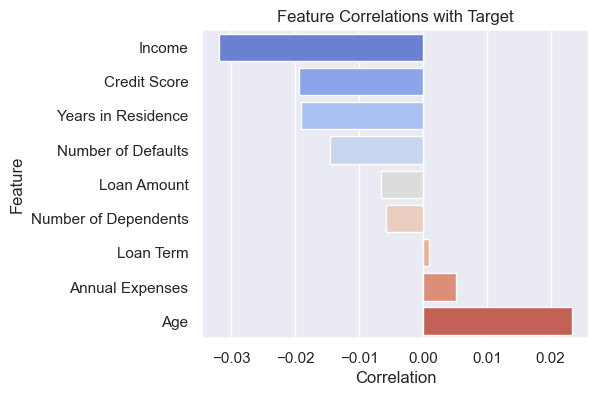

In [181]:
plt.figure(figsize=(5, 4))
sns.barplot(x=correlations_df['correlation'], y=correlation_df.index, palette='coolwarm')
plt.title('Feature Correlations with Target')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()

In [182]:
# dados categóricos transformados
correlations_cat = df_categorico.corr()['Default Probability'].drop('Default Probability')  # Remove a correlação da target consigo mesma

# Criar um DataFrame com as correlações e ordenar em ordem crescente
correlations_cat = pd.DataFrame(correlations_cat)
correlations_cat.columns = ['correlation']
correlations_cat = correlations_cat.sort_values(by='correlation', ascending=True)

C:\Users\bianca\AppData\Local\Temp\ipykernel_41504\3317463062.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_cat['correlation'], y=correlations_cat.index, palette='coolwarm')


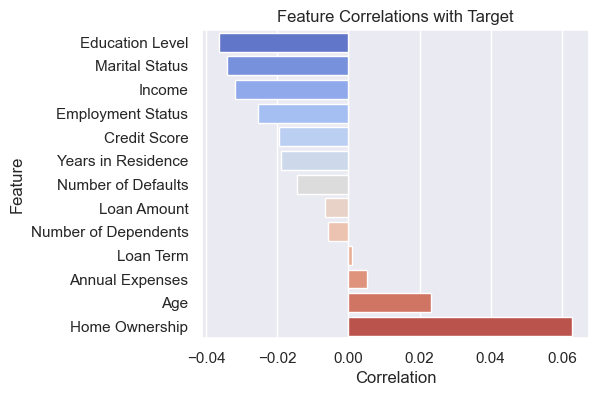

In [183]:
plt.figure(figsize=(5, 4))
sns.barplot(x=correlations_cat['correlation'], y=correlations_cat.index, palette='coolwarm')
plt.title('Feature Correlations with Target')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()

In [184]:
# dados numéricos agrupados 
correlations_grouped = df_grouped_final.corr()['Default Probability'].drop('Default Probability')  # Remove a correlação da target consigo mesma

# Criar um DataFrame com as correlações e ordenar em ordem crescente
correlations_grouped = pd.DataFrame(correlations_grouped)
correlations_grouped.columns = ['correlation']
correlations_grouped = correlations_grouped.sort_values(by='correlation', ascending=True)

C:\Users\bianca\AppData\Local\Temp\ipykernel_41504\1663897724.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_grouped['correlation'], y=correlations_grouped.index, palette='coolwarm')


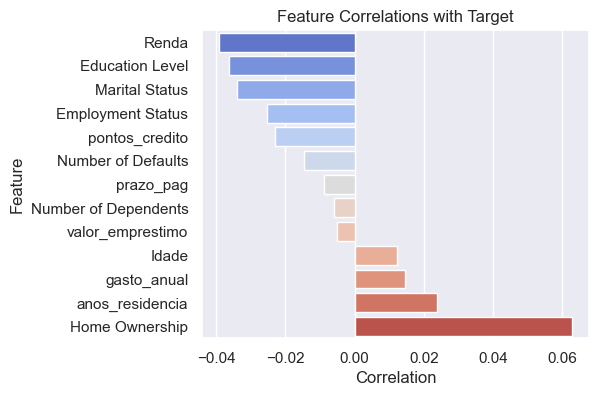

In [185]:
plt.figure(figsize=(5, 4))
sns.barplot(x=correlations_grouped['correlation'], y=correlations_grouped.index, palette='coolwarm')
plt.title('Feature Correlations with Target')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()

In [166]:
sns.set(font_scale=1.3)
sns.set(rc={'figure.figsize': (20, 20)})

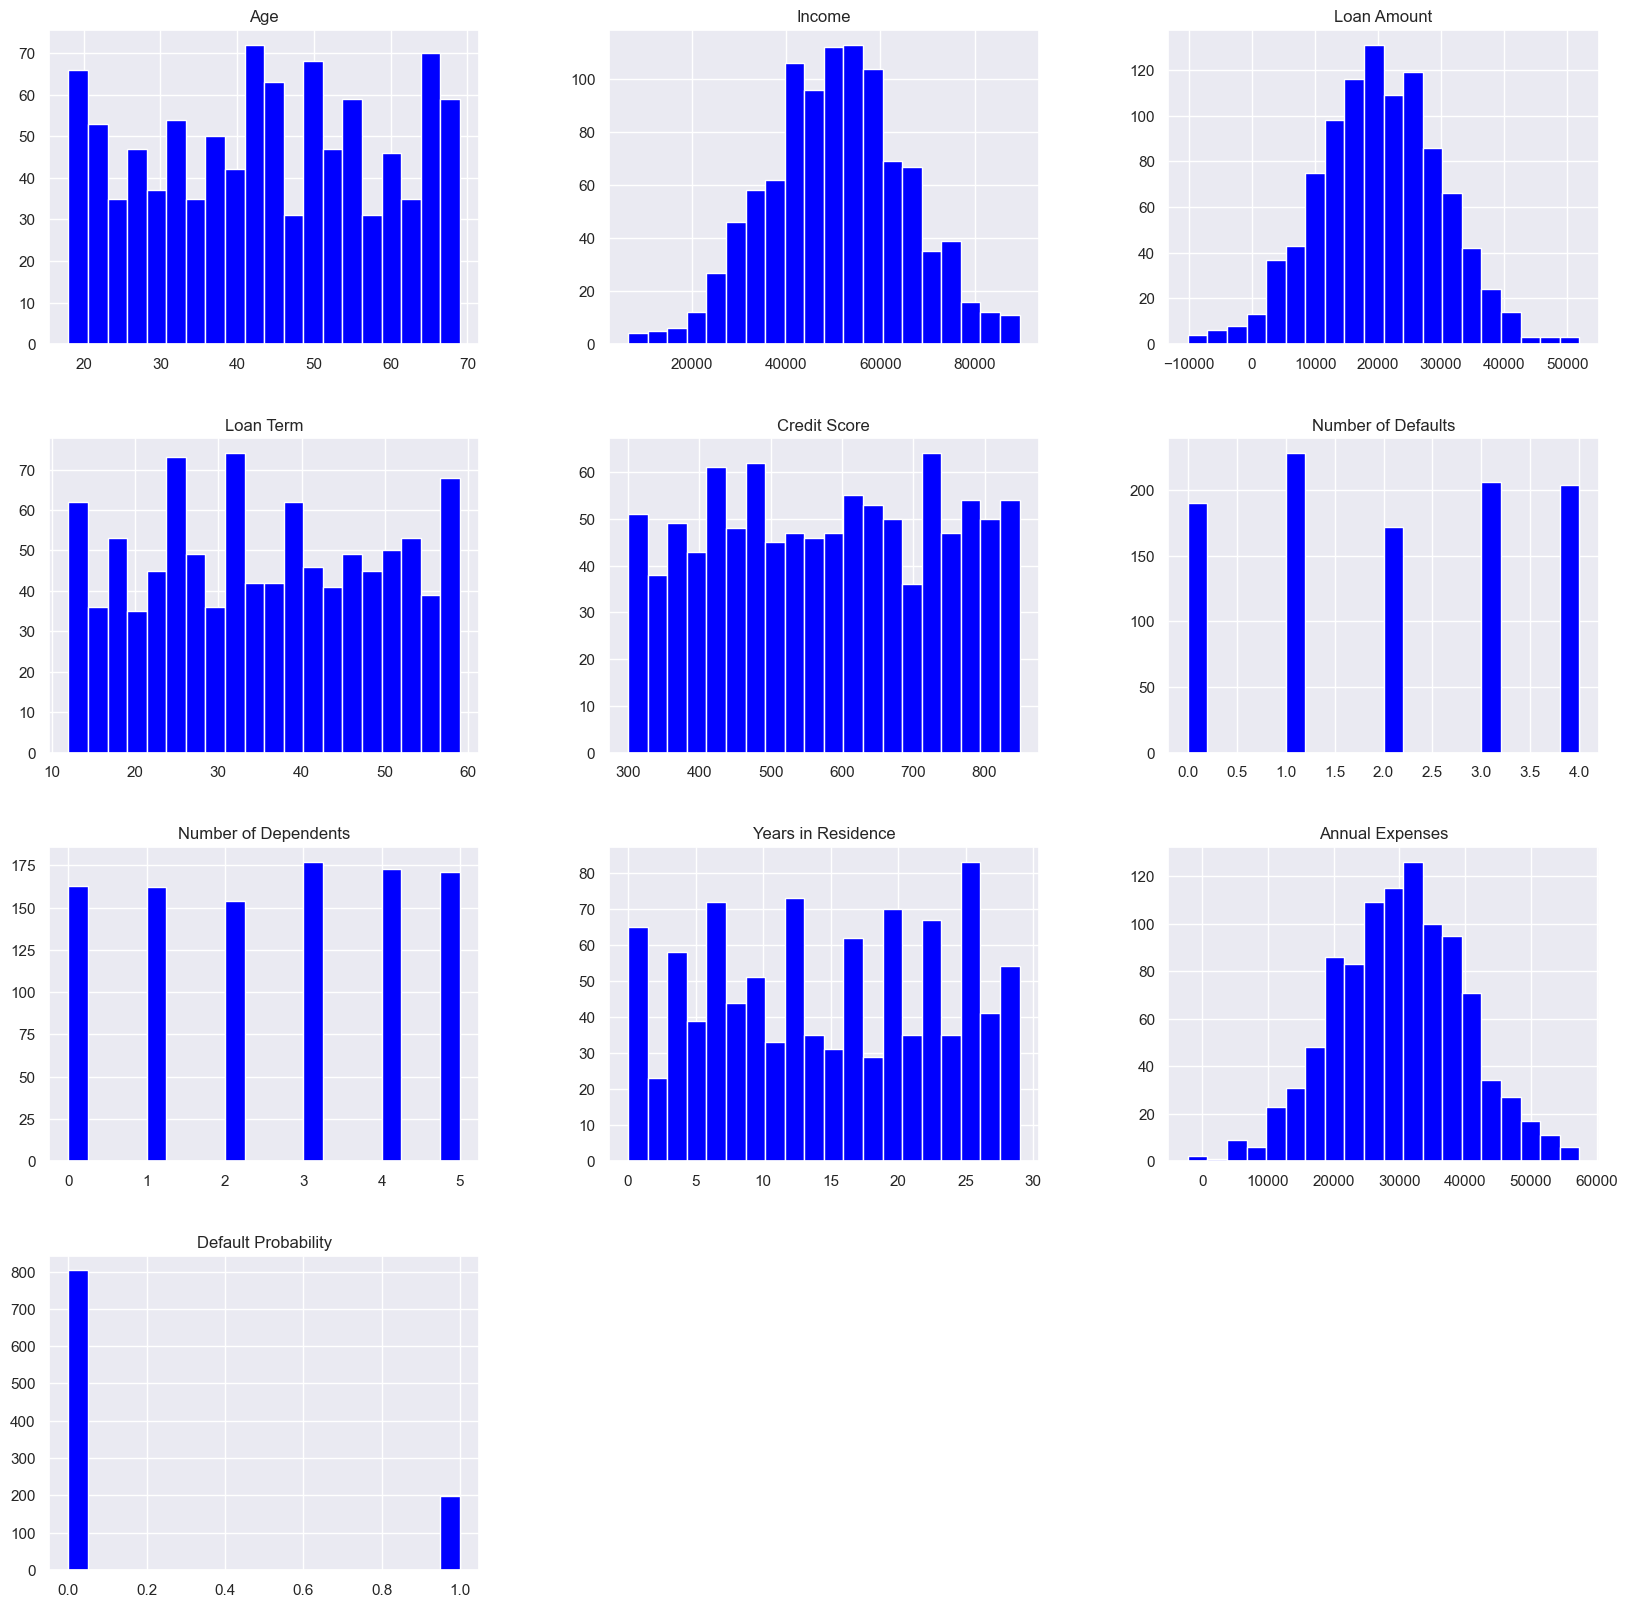

In [186]:
eixo = df.hist(bins=20, color='blue')
plt.show()

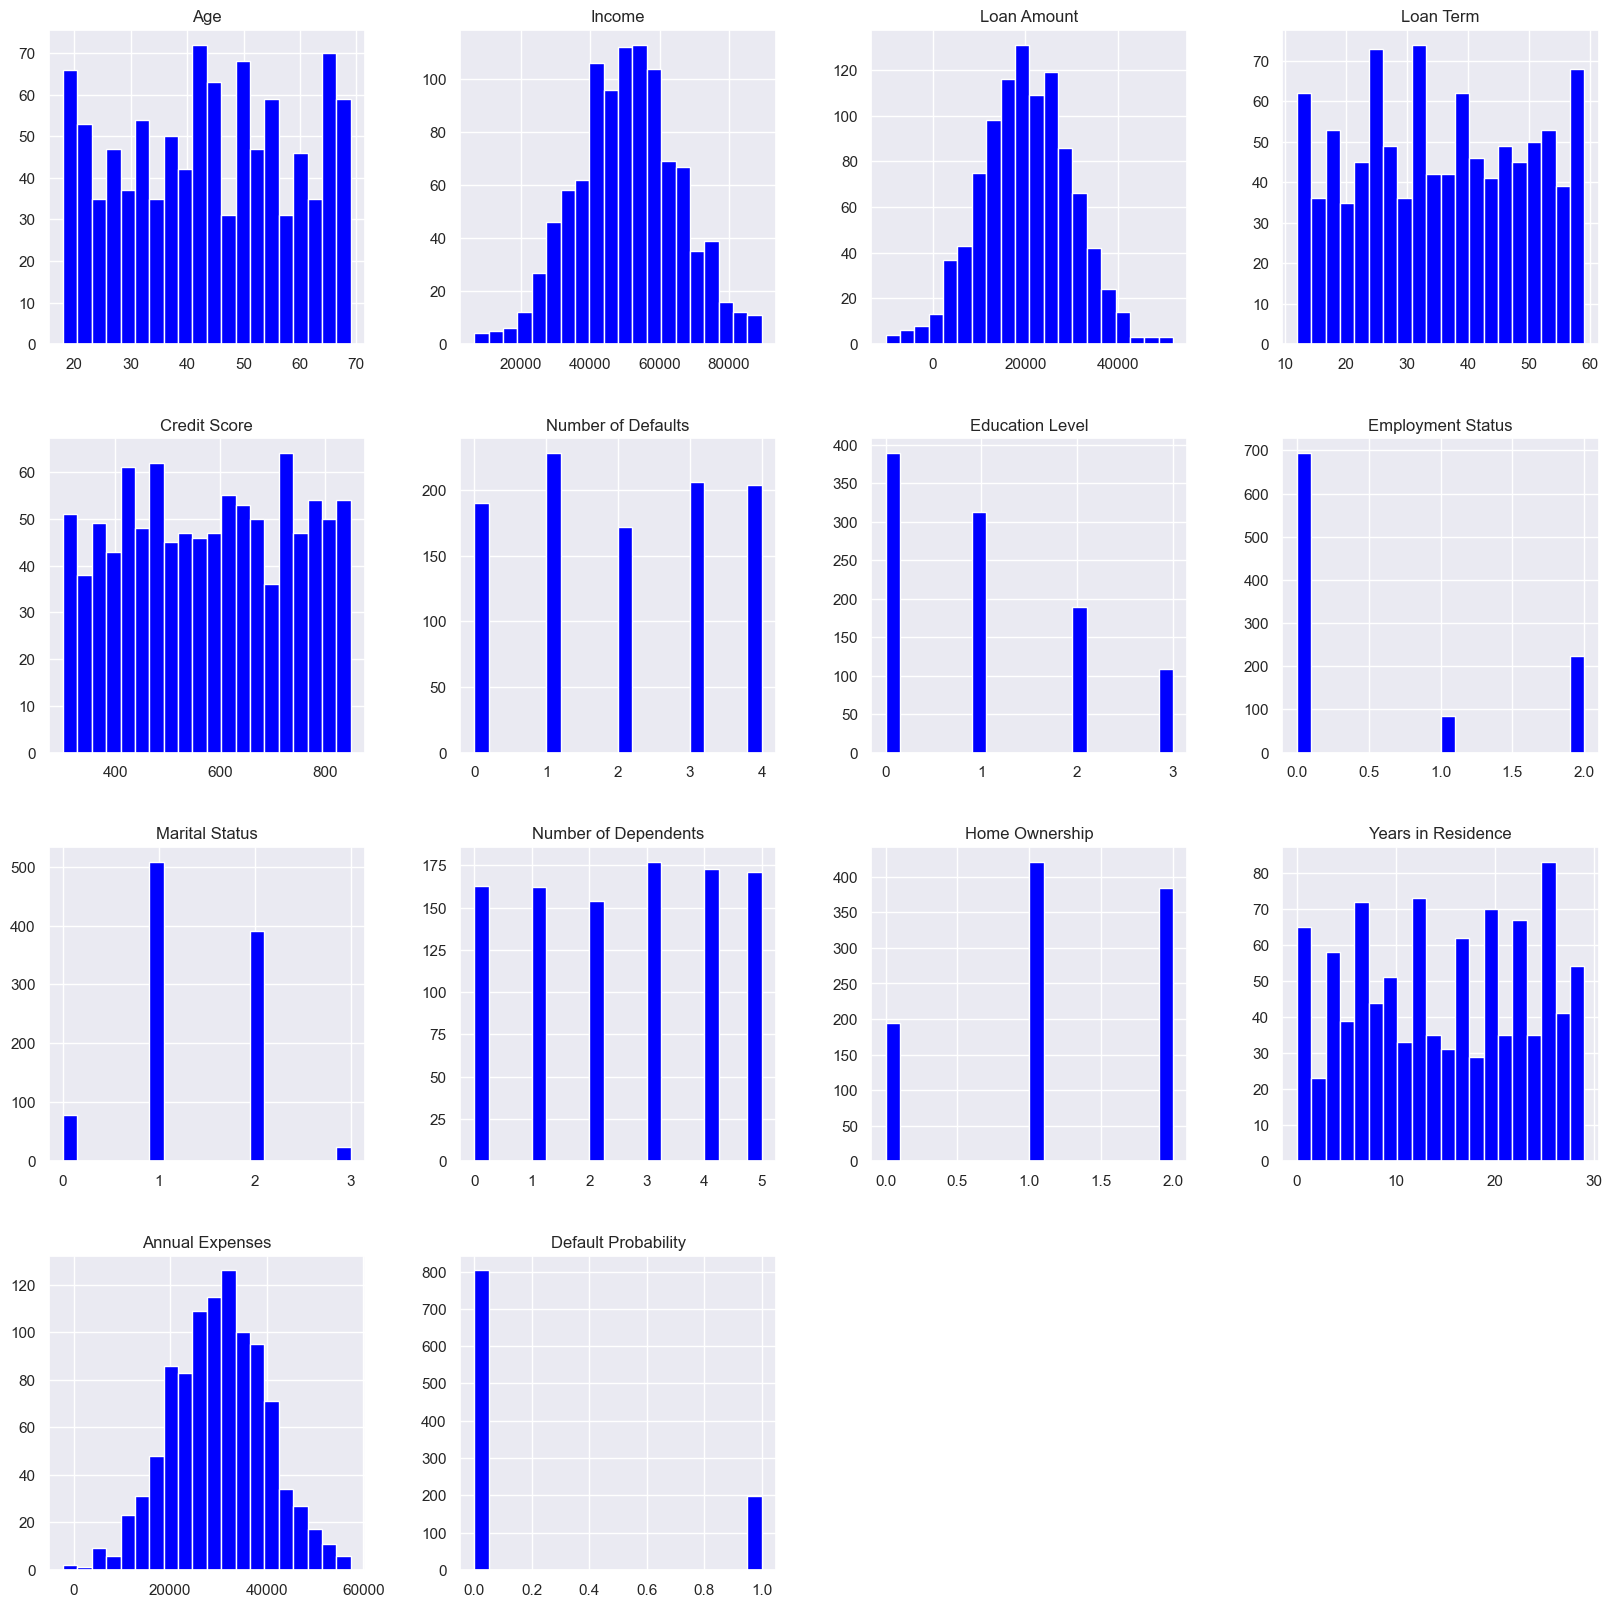

In [187]:
eixo = df_categorico.hist(bins=20, color='blue')
plt.show()

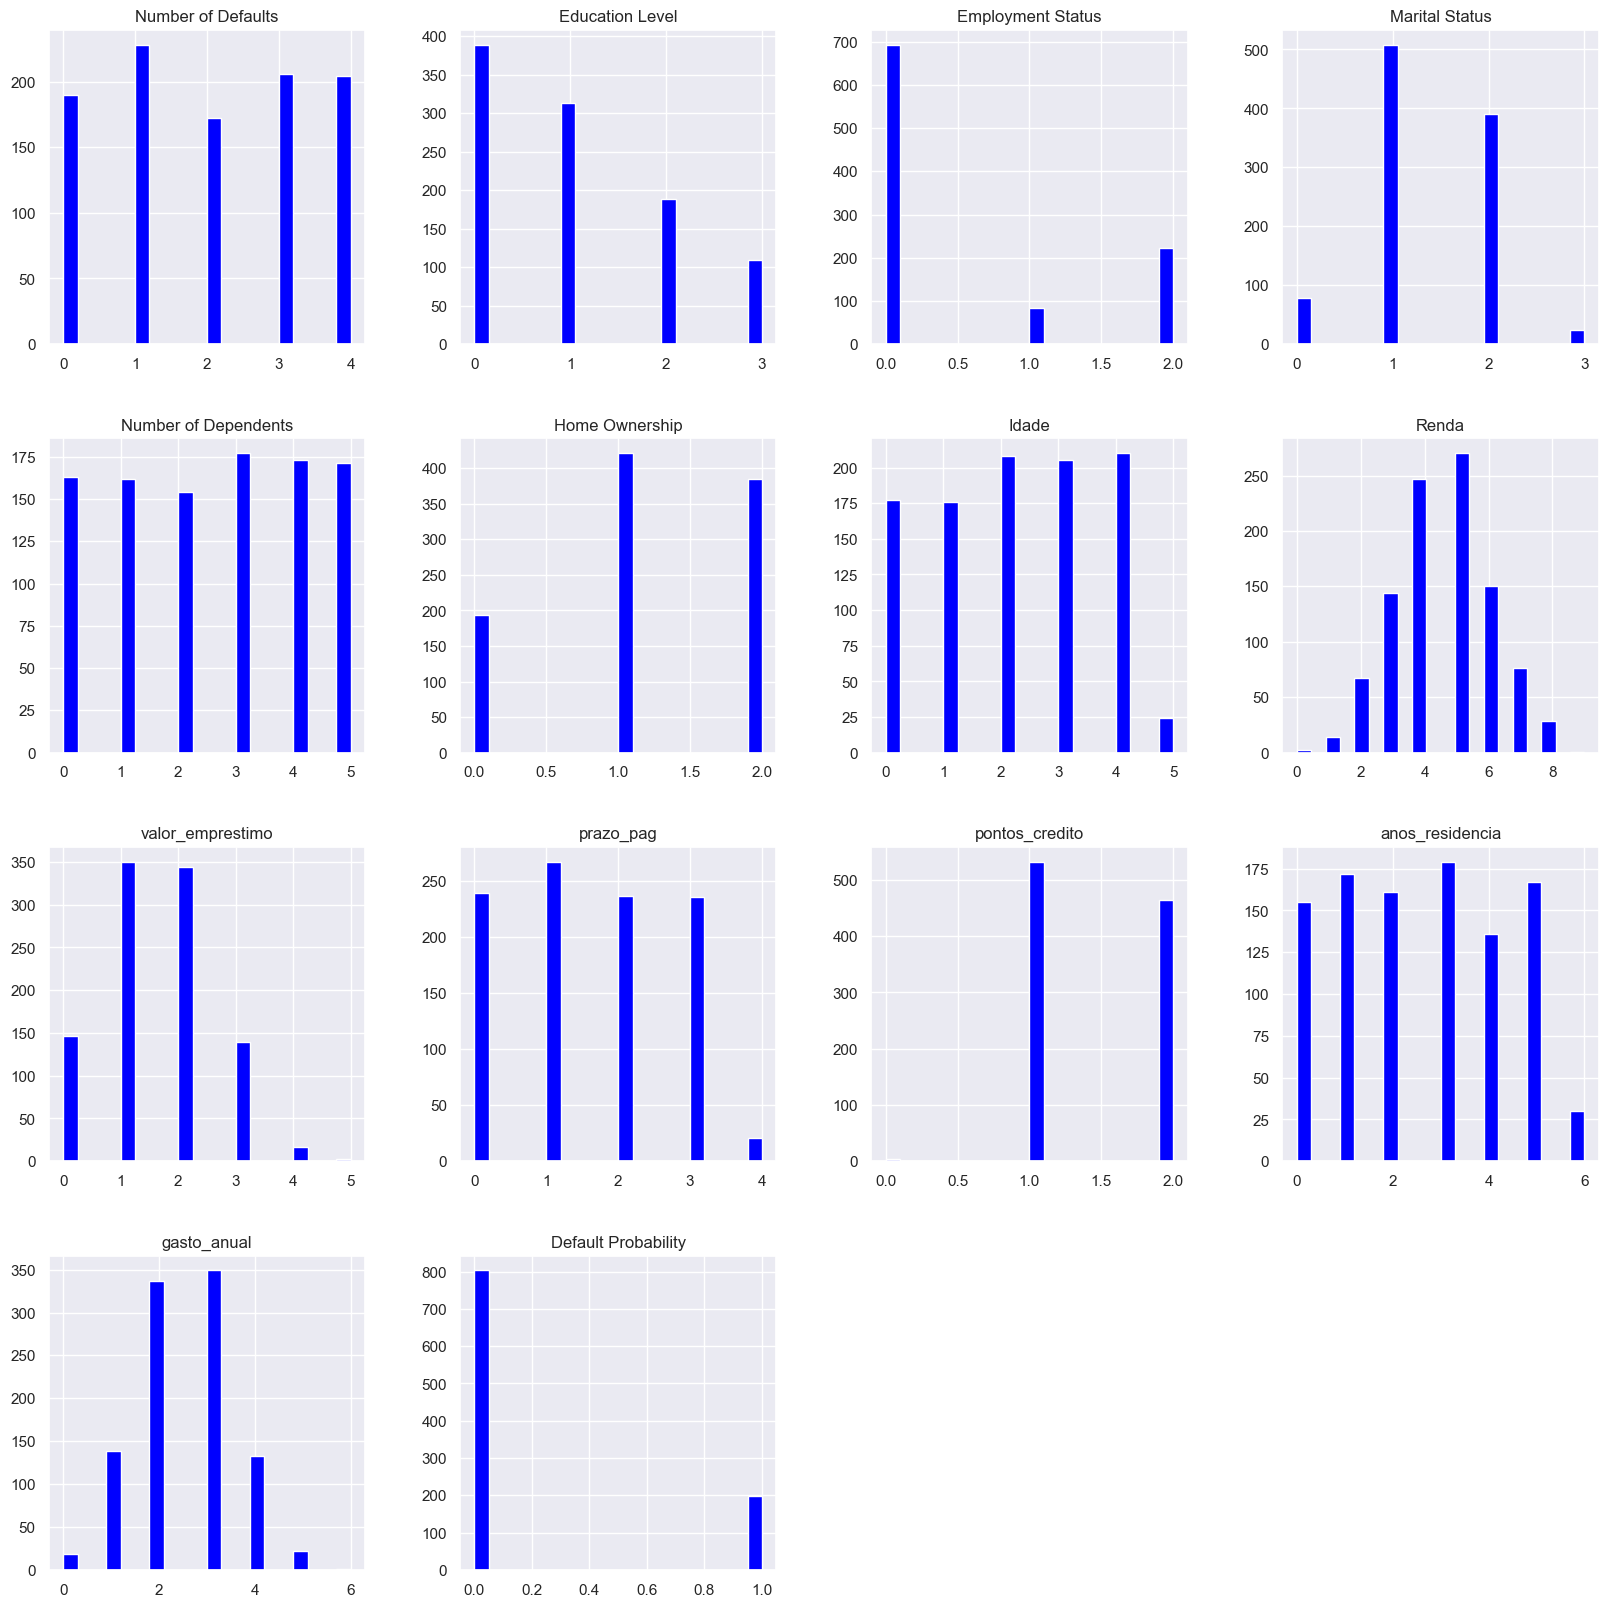

In [188]:
eixo = df_grouped_final.hist(bins=20, color='blue')
plt.show()

## Divisão Treino e Teste: Dados Agrupados e Desagrupados

In [278]:
df_categorico.head()

,Age,Income,Loan Amount,Loan Term,Credit Score,Number of Defaults,Education Level,Employment Status,Marital Status,Number of Dependents,Home Ownership,Years in Residence,Annual Expenses,Default Probability
0,56,25903,37269,47,761,3,3,0,1,5,2,28,20629,1
1,69,53051,16003,54,312,0,0,0,2,1,0,12,41678,0
2,46,38654,22246,48,683,3,0,0,1,3,1,7,20467,0
3,32,28666,29325,26,698,1,0,0,1,1,1,21,39952,0
4,60,40301,5816,39,318,2,3,0,2,3,1,20,29884,0


In [279]:
#Separação dados desagrupados
X_desagrup = df_categorico.iloc[:, 0:12].values
X_desagrup.shape

(1000, 12)

In [280]:
#Separação das classes
y_desagrup = df_categorico.iloc[:, 13].values
y_desagrup.shape

(1000,)

In [284]:
#Separação dados agrupados
X_agrup = df_grouped_final.iloc[:, 0:12].values
X_agrup.shape

(1000, 12)

In [285]:
#Separação das classes
y_agrup = df_categorico.iloc[:, 13].values
y_agrup.shape

(1000,)

## Seleção de Features

Com base na análise anterior, selecionaremos as melhores features de cada dataframe para treina o modelo

In [202]:
# Seleção de features dataframe original
col_relevancia_df = ['Income', 'Credit Score', 'Years in Residence', 'Age', 'Default Probability']
feature_df = df[col_relevancia_df]

In [203]:
# Seleção de features dados desagrupados
col_relevancia_categ = ['Education Level', 'Marital Status', 'Income', 'Employment Status', 'Home Ownership', 'Age', 'Default Probability']
feature_categ = df_categorico[col_relevancia_categ]

In [204]:
# Seleção de features dados agrupados
col_relevancia_group = ['Renda', 'Education Level', 'Marital Status', 'Home Ownership', 'anos_residencia', 'Default Probability']
feature_grouped = df_grouped_final[col_relevancia_group]

### Treinamento 3º Modelo
dados desagrupados com feature selection

In [215]:
#Separação de features
X_3 = feature_categ.iloc[:, 0:5].values
X_3.shape

(1000, 5)

In [218]:
#Separação das classes
y_3 = feature_categ.iloc[:, 6].values
y_3.shape

(1000,)

In [231]:
# Dividindo bases de treino e teste
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size= 0.3)


In [232]:
#Treinando o modelo
regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_train_3, y_train_3)

C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [233]:

# Aplicando previsões aos dados de teste
y_pred_3 = regressao_logistica.predict(x_test_3)

In [234]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test_3, y_pred_3)
conf_matrix = confusion_matrix(y_test_3, y_pred_3)
class_report = classification_report(y_test_3, y_pred_3)

print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)

Acurácia: 0.8166666666666667
Matriz de Confusão:
 [[245   0]
 [ 55   0]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       245
           1       0.00      0.00      0.00        55

    accuracy                           0.82       300
   macro avg       0.41      0.50      0.45       300
weighted avg       0.67      0.82      0.73       300



C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

### Treinamento 4º Modelo
dados agrupados com feature selection

In [224]:
feature_grouped.head()

,Renda,Education Level,Marital Status,Home Ownership,anos_residencia,Default Probability
0,2,3,1,2,4,1
1,5,0,2,0,1,0
2,3,0,1,1,5,0
3,2,0,1,1,3,0
4,4,3,2,1,2,0


In [225]:
#Separação de features
X_4 = feature_grouped.iloc[:, 0:4].values
X_4.shape

(1000, 4)

In [226]:
#Separação das classes
y_4 = feature_grouped.iloc[:, 5].values
y_4.shape

(1000,)

In [235]:
# Dividindo bases de treino e teste
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(X_4,y_4, test_size= 0.3)


In [236]:
#Treinando o modelo
regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_train_4, y_train_4)


LogisticRegression()

In [237]:
# Aplicando previsões aos dados de teste
y_pred_4 = regressao_logistica.predict(x_test_4)


In [238]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test_4, y_pred_4)
conf_matrix = confusion_matrix(y_test_4, y_pred_4)
class_report = classification_report(y_test_4, y_pred_4)

print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)

Acurácia: 0.8266666666666667
Matriz de Confusão:
 [[248   0]
 [ 52   0]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       248
           1       0.00      0.00      0.00        52

    accuracy                           0.83       300
   macro avg       0.41      0.50      0.45       300
weighted avg       0.68      0.83      0.75       300



C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

## Baleanceamento das classes

Como observado anteriormente, o taret alvo está desbalanceado, ou seja, existe uma desproporção entre classes 0 e 1. Essa caracteristica dos dados prejudica o treinamento do modelo, fazendo com que ele aprenda apenas sobre a classificação da maior classe. 
Portanto serão testadas 2 técnicas de balanceamento:

1- Tomek Link
2- SMOTE

In [249]:
# Método de undersampling - Tomek links
# dados desagrupados e com feature selection

tl = TomekLinks(sampling_strategy = 'auto')
X_tl_cat, y_tl_cat = tl.fit_resample(X_3,y_3)

In [250]:
np.unique(y_tl_cat, return_counts=True)

(array([0, 1], dtype=int64), array([710, 197], dtype=int64))

In [244]:
# Método de undersampling - Tomek links
# dados agrupados e com feature selection

tl = TomekLinks(sampling_strategy = 'auto')
X_tl_group, y_tl_group = tl.fit_resample(X_4,y_4)

In [245]:
np.unique(y_tl_group, return_counts=True)

(array([0, 1], dtype=int64), array([802, 197], dtype=int64))

### Treinamento 5ª

Como a aplicação do Tomek Link só trouxe resultados significativos em dados desagrupados, somente esta base balanceada será testada.

In [255]:
# Dividindo bases de treino e teste
x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(X_tl_cat, y_tl_cat, test_size= 0.3)


In [256]:
#Treinando o modelo
regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_train_5, y_train_5)

C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [257]:
# Aplicando previsões aos dados de teste
y_pred_5 = regressao_logistica.predict(x_test_5)


In [258]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test_5, y_pred_5)
conf_matrix = confusion_matrix(y_test_5, y_pred_5)
class_report = classification_report(y_test_5, y_pred_5)

print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)

Acurácia: 0.7912087912087912
Matriz de Confusão:
 [[216   0]
 [ 57   0]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       216
           1       0.00      0.00      0.00        57

    accuracy                           0.79       273
   macro avg       0.40      0.50      0.44       273
weighted avg       0.63      0.79      0.70       273



C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

In [259]:
# Método de oversampling - SMOTE
from imblearn.over_sampling import SMOTE

In [260]:
# dados desagrupados e com feature selection
smote = SMOTE(sampling_strategy='minority')
X_cat_smote, y_cat_smote = smote.fit_resample(X_3, y_3)

In [261]:
np.unique(y_cat_smote, return_counts=True)

(array([0, 1], dtype=int64), array([803, 803], dtype=int64))

In [262]:
# dados agrupados e com feature selection
smote = SMOTE(sampling_strategy='minority')
X_grouped_smote, y_grouped_smote = smote.fit_resample(X_4, y_4)


In [263]:
np.unique(y_grouped_smote, return_counts=True)

(array([0, 1], dtype=int64), array([803, 803], dtype=int64))

### Treinamento 6º
Dados desagrupados com balanceameno SMOTE

In [266]:
# Dividindo bases de treino e teste
x_train_6, x_test_6, y_train_6, y_test_6 = train_test_split(X_cat_smote, y_cat_smote, test_size= 0.3)

In [267]:
#Treinando o modelo
regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_train_6, y_train_6)

C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [268]:
# Aplicando previsões aos dados de teste
y_pred_6 = regressao_logistica.predict(x_test_6)

In [269]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test_6, y_pred_6)
conf_matrix = confusion_matrix(y_test_6, y_pred_6)
class_report = classification_report(y_test_6, y_pred_6)

print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)

Acurácia: 0.6473029045643154
Matriz de Confusão:
 [[153  87]
 [ 83 159]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.65      0.64      0.64       240
           1       0.65      0.66      0.65       242

    accuracy                           0.65       482
   macro avg       0.65      0.65      0.65       482
weighted avg       0.65      0.65      0.65       482



### Treinamento 7º
Dados agrupados com balanceameno SMOTE

In [274]:
# Dividindo bases de treino e teste
x_train_7, x_test_7, y_train_7, y_test_7 = train_test_split(X_grouped_smote, y_grouped_smote, test_size= 0.3)

In [275]:
#Treinando o modelo
regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_train_7, y_train_7)

LogisticRegression()

In [276]:
# Aplicando previsões aos dados de teste
y_pred_7 = regressao_logistica.predict(x_test_7)

In [277]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test_7, y_pred_7)
conf_matrix = confusion_matrix(y_test_7, y_pred_7)
class_report = classification_report(y_test_7, y_pred_7)

print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)

Acurácia: 0.5643153526970954
Matriz de Confusão:
 [[143  74]
 [136 129]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.51      0.66      0.58       217
           1       0.64      0.49      0.55       265

    accuracy                           0.56       482
   macro avg       0.57      0.57      0.56       482
weighted avg       0.58      0.56      0.56       482



## TREINAMENTO DO MODELO 

Sem Balanceamento

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Dividindo bases de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [ ]:
x_train.shape, x_test.shape

((800, 4), (200, 4))

In [ ]:
# Treinando modelo com dados desbalanceados
regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_train, y_train)


C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Aplicando previsões aos dados de teste
y_pred = regressao_logistica.predict(x_test)


In [ ]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)


Acurácia: 0.855
Matriz de Confusão:
 [[171   0]
 [ 29   0]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       171
           1       0.00      0.00      0.00        29

    accuracy                           0.85       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.73      0.85      0.79       200



C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

## TREINAMENTO DO MODELO TOMEK LINK

In [ ]:
# Dividindo bases de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X_tl,y_tl, test_size= 0.2)

In [ ]:
# Treinando modelo com dados desbalanceados
regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_train, y_train)

C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_tl = regressao_logistica.predict(x_test)

In [ ]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred_tl)
conf_matrix = confusion_matrix(y_test, y_pred_tl)
class_report = classification_report(y_test, y_pred_tl)

print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)

C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Acurácia: 0.7472527472527473
Matriz de Confusão:
 [[136   0]
 [ 46   0]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       136
           1       0.00      0.00      0.00        46

    accuracy                           0.75       182
   macro avg       0.37      0.50      0.43       182
weighted avg       0.56      0.75      0.64       182



C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## TREINAMENTO SMOTE

In [ ]:
# Dividindo bases de treino e teste
seed = 1
x_train, x_test, y_train, y_test = train_test_split(X_smote,y_smote, test_size= 0.3, random_state=seed)

In [ ]:
# Treinando modelo com dados desbalanceados
regressao_logistica = LogisticRegression(max_iter = 1000)
regressao_logistica.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_smote = regressao_logistica.predict(x_test)

In [ ]:

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred_smote)
conf_matrix = confusion_matrix(y_test, y_pred_smote)
class_report = classification_report(y_test, y_pred_smote)

print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)




Acurácia: 0.6690140845070423
Matriz de Confusão:
 [[136  95]
 [ 46 149]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.75      0.59      0.66       231
           1       0.61      0.76      0.68       195

    accuracy                           0.67       426
   macro avg       0.68      0.68      0.67       426
weighted avg       0.68      0.67      0.67       426

